# Competition Description

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

![img](https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Goal**

Is to predict the sales price for each house. For each Id in the test set, we must predict the value of the SalePrice variable. Predicted file should look like this one:

![img](https://img001.prntscr.com/file/img001/b3WX8oqrRKuwRoFQDAEoPg.png)

# DATA EXPLORATION ANALYSIS

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)


## Import the library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    SGDRegressor,
    ElasticNet,
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

warnings.filterwarnings("ignore")
%matplotlib inline

## Load the dataset

In [4]:
df_train = pd.read_csv(
    "./input/train.csv"
)

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Identifying Key Variables for Predicting SalePrice

To better understand the housing data, it’s useful to examine each variable to see how it might influence the SalePrice. A structured approach can help, so creating an Excel sheet with specific columns like Variable, Type (categorical or numerical), Segment (building, space, or location), Expectation (High, Medium, Low), Conclusion, and Comments will be processed .

This process sharpens your intuition about what factors might impact house prices. After reviewing the variables, it was concluded that OverallQual, YearBuilt, TotalBsmtSF, and GrLivArea are likely to be significant. Although location is often emphasized in real estate, this quick analysis suggested that some location-related variables, like Neighborhood, might be less impactful than expected. This could be due to the visualization methods used, like scatter plots, which might not fully capture the importance of categorical variables.

The exercise, though time-consuming, helped clarify expectations and identify key variables, setting the stage for more focused analysis.

### Analysing 'SalePrice'

*** ★★★ In the world of real estate, every home has a story to tell, and every house price narrates a unique tale of its own. Let’s embark on a journey together to explore the distribution of house prices, uncovering how each price reflects the lives, dreams, and efforts of the people who call these houses their homes. ★★★ *** 🌙

In [6]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*'It seems that  minimum price is larger than zero.'*

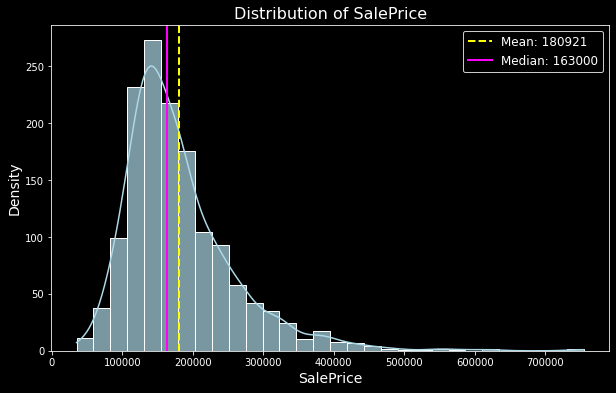

In [7]:
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))
sns.histplot(
    df_train["SalePrice"], kde=True, color="lightblue", bins=30, alpha=0.7
)
plt.title("Distribution of SalePrice", color="white", fontsize=16)
plt.xlabel("SalePrice", color="white", fontsize=14)
plt.ylabel("Density", color="white", fontsize=14)


mean_price = df_train["SalePrice"].mean()
median_price = df_train["SalePrice"].median()
plt.axvline(
    mean_price,
    color="yellow",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {mean_price:.0f}",
)
plt.axvline(
    median_price,
    color="magenta",
    linestyle="-",
    linewidth=2,
    label=f"Median: {median_price:.0f}",
)
plt.legend(facecolor="black", edgecolor="white", fontsize=12)


plt.gca().spines["top"].set_color("white")
plt.gca().spines["right"].set_color("white")
plt.gca().spines["bottom"].set_color("white")
plt.gca().spines["left"].set_color("white")
plt.gca().xaxis.label.set_color("white")
plt.gca().yaxis.label.set_color("white")
plt.gca().tick_params(axis="both", colors="white")


plt.show()

The graph depicts the distribution of SalePrice for a dataset. The horizontal axis represents the Sale Price values, while the vertical axis shows the density of the distribution.


**The key information highlighted on the graph:**

    Mean SalePrice: 180921
        This indicates the average sale price across the dataset.
        
    Median SalePrice: 163000
        The median represents the middle value, where half the prices are above and half are below this point.

**The distribution exhibits the following characteristics:**

    Positive Skewness:
        The distribution is skewed to the right, with a longer tail extending towards higher prices. This suggests the data has more high-value outliers.

    Peak around 200,000: 
        There is a pronounced peak in the distribution around the 200,000 price point, indicating this is a common or typical sale price in the dataset.
        
    Outliers/Extreme Values:
        The extended right tail of the distribution suggests the presence of some high-value outliers or extreme sale prices.

In [8]:
print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


> The skewness value of 1.882876 indicates that the 'SalePrice' distribution is positively skewed, meaning the distribution has a longer right tail and the bulk of the values are concentrated on the left side of the distribution. Positive skewness implies that the majority of the data values are below the mean, and there are some high-value outliers or extreme values pulling the distribution to the right.

> The kurtosis value of 6.536282 suggests that the 'SalePrice' distribution has a higher peak and heavier tails compared to a normal distribution (which has a kurtosis of 3).
> A kurtosis value greater than 3 indicates a leptokurtic distribution, meaning the distribution has a sharper peak and longer, fatter tails compared to a normal distribution.

### Relationship with numerical variables

In [9]:
var = "GrLivArea"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
data[:10]

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
5,143000,1362
6,307000,1694
7,200000,2090
8,129900,1774
9,118000,1077


<Figure size 720x432 with 0 Axes>

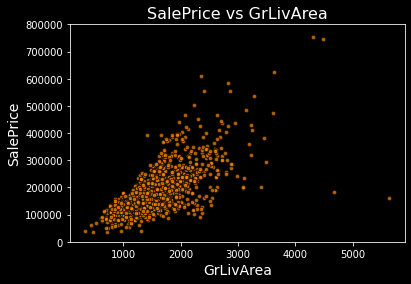

In [10]:
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
plt.figure(figsize=(10, 6))
ax = data.plot.scatter(
    x=var,
    y="SalePrice",
    c="darkorange",
    alpha=0.7,
    edgecolor="black",
    ylim=(0, 800000),
)


plt.title(f"SalePrice vs {var}", fontsize=16)
plt.xlabel(var, fontsize=14)
plt.ylabel("SalePrice", fontsize=14)


plt.show()

* The plot suggests a strong linear relationship between the two variables, where SalePrice generally increases as GrLivArea increases.

<Figure size 720x432 with 0 Axes>

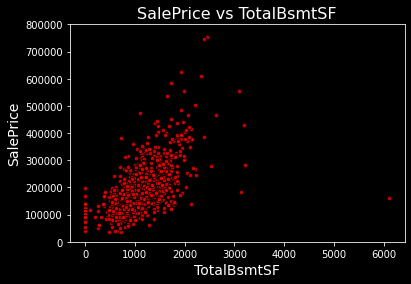

In [11]:
var = "TotalBsmtSF"

data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
plt.figure(figsize=(10, 6))
ax = data.plot.scatter(
    x=var,
    y="SalePrice",
    c="red",
    alpha=0.8,
    edgecolor="black",
    ylim=(0, 800000),
)

plt.title(f"SalePrice vs {var}", fontsize=16)
plt.xlabel(var, fontsize=14)
plt.ylabel("SalePrice", fontsize=14)

plt.show()

    The scatter plot of SalePrice versus TotalBsmtSF reveals a strong and potentially nonlinear relationship between these two variables. This relationship appears to exhibit a more complex pattern than a simple linear correlation, suggesting an exponential or threshold-like behavior.

### Relationship with categorical features

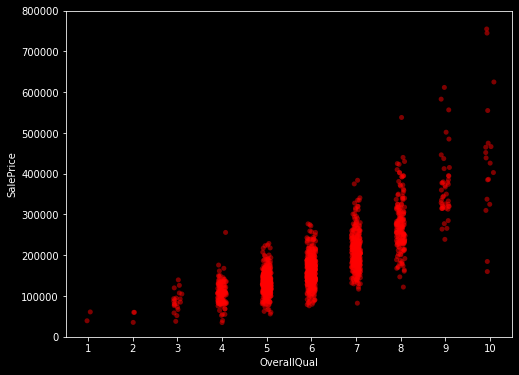

In [12]:
var = "OverallQual"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    x=var,
    y="SalePrice",
    data=data,
    ax=ax,
    estimator=lambda x: len(x),
    ci=None,
    color="lightgray",
    alpha=0.6,
)
sns.stripplot(
    x=var, y="SalePrice", data=data, ax=ax, color="red", alpha=0.5, jitter=True
)

ax.axis(ymin=0, ymax=800000)
plt.show()

    Graph depicts the relationship between the "OverallQual" (a measure of overall quality of a house) and the corresponding "Sale Price" (the price the house was sold for). The x-axis shows the OverallQual values ranging from 1 to 10, while the y-axis represents the Sale Price in dollars.
    The plot consists of a scattered set of red dots, where each dot represents a data point corresponding to a house sale. The pattern shows that as the OverallQual value increases, the Sale Price tends to increase as well, indicating a positive correlation between the two variables. Houses with higher overall quality tend to fetch higher sale prices.

### Average sale price



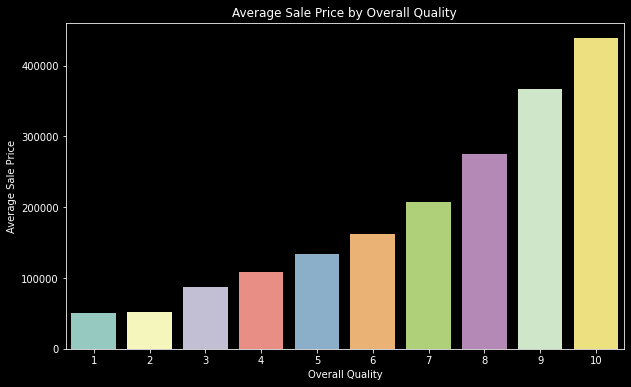

,OverallQual,SalePrice
0,1,50150.000000
1,2,51770.333333
2,3,87473.750000
3,4,108420.655172
4,5,133523.347607
5,6,161603.034759
6,7,207716.423197
7,8,274735.535714
8,9,367513.023256
9,10,438588.388889


In [13]:
quality_price = (
    df_train.groupby("OverallQual")["SalePrice"].mean().reset_index()
)
plt.figure(figsize=(10, 6))


sns.barplot(x="OverallQual", y="SalePrice", data=quality_price)
plt.title("Average Sale Price by Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Average Sale Price")

plt.show()
quality_price[:10]

*'SalePrice' connected to 'OverallQual'.*

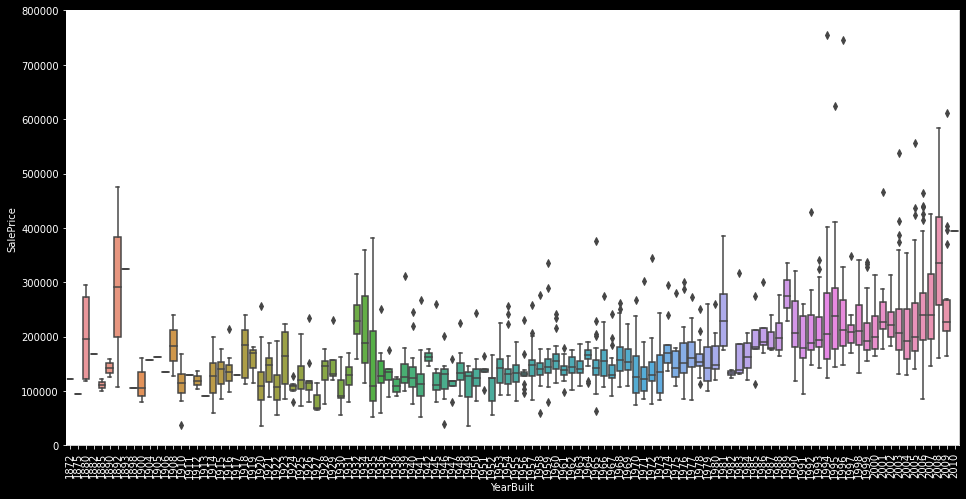

In [14]:
var = "YearBuilt"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)

f, ax = plt.subplots(figsize=(16, 8))

fig = sns.boxplot(x=var, y="SalePrice", data=data, ax=ax)


fig.set_facecolor("lightgrey")
ax.set_facecolor("white")

ax.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

plt.show()

This visualization allows us to make the following observations:

    There is a general trend toward higher median sales prices for homes built in more recent years.
    
    The spread of prices (the size of the "boxes") also increases for newer homes, indicating greater variability in pricing.
    
    Some years of construction have significantly higher sales prices (outliers), which may be due to factors other than just the year of construction.

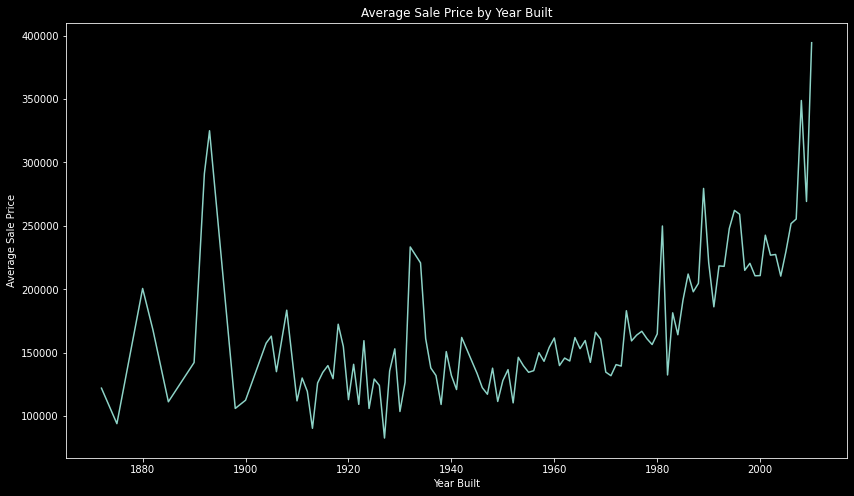

In [15]:
year_price = df_train.groupby("YearBuilt")["SalePrice"].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x="YearBuilt", y="SalePrice", data=year_price)

plt.title("Average Sale Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average Sale Price")
plt.show()

    General Trend: The average sale price of homes has been increasing over time, although with significant fluctuations.

    High Volatility: Average prices show significant fluctuations from year to year, especially in earlier periods. This indicates a high degree of variability in the real estate market.
    
    Extremes: There are sharp price jumps in some years, reaching very high levels. This may indicate the influence of specific factors other than just the year of construction.
    
    Unevenness: The rate of growth of average prices is uneven across different historical periods. Several cycles of price increases and decreases can be identified.

### In summary

Stories aside, we can conclude that:

>  'GrLivArea' and 'TotalBsmtSF' exhibit strong linear relationships with 'SalePrice'. Both variables are positively correlated, meaning that as the living area or basement size increases, so does the sale price. Notably, the relationship with 'TotalBsmtSF' has a particularly steep slope, indicating a significant impact on the sale price with changes in basement size.

> 'OverallQual' and 'YearBuilt' also show a relationship with 'SalePrice'. The influence of these variables is evident, particularly with 'OverallQual', where higher quality ratings correspond to higher sale prices. The year a house was built also contributes to its sale price, although the relationship might not be as straightforward as with 'OverallQual'.

> While we have only analyzed four variables, it's clear that selecting the right features is crucial for predicting SalePrice. The goal is to identify the most impactful variables rather than focusing solely on defining complex relationships between them. This approach emphasizes the importance of feature selection over feature engineering in this context.

However, our analysis doesn't stop here. There are many more variables to explore, and understanding the interplay between these factors could further refine our predictive model. The next steps would involve a comprehensive examination of other potential predictors, ensuring that our model captures the most relevant aspects of the housing data. This approach not only helps in simplifying the model but also enhances its predictive accuracy.

# Explanatory Variables

To explore the universe let's use:
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

#### Correlation matrix (heatmap style)

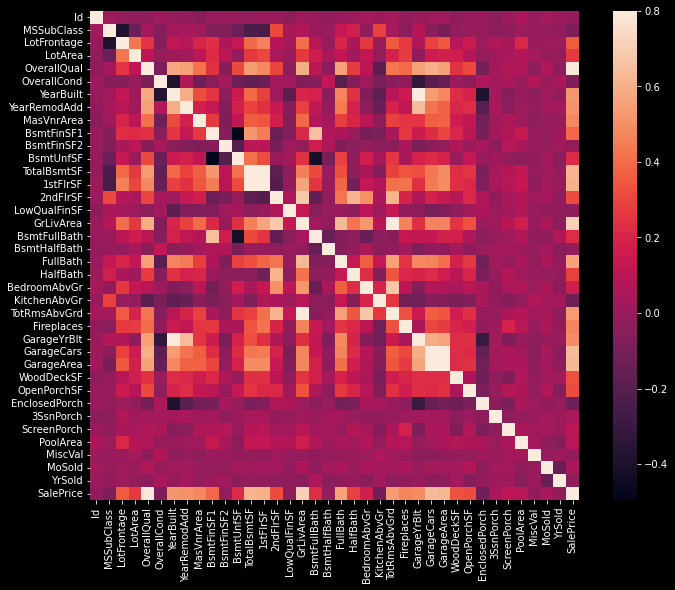

In [16]:
numeric_df = df_train.select_dtypes(include=["float64", "int64"])

corrmat = numeric_df.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

Two notable correlations stand out:

    'TotalBsmtSF' and '1stFlrSF': The strong correlation between these two variables suggests they might be conveying similar information. This high degree of correlation is a classic sign of multicollinearity, where two or more variables are so closely related that they essentially duplicate the same information. In the context of our analysis, this is a critical observation, as multicollinearity can skew the results and interpretations of our models. By identifying this through the heatmap, we can consider dropping one of these variables or combining them to mitigate the issue.

    'GarageX' Variables: Similarly, the 'GarageX' variables show significant correlations with each other. These variables likely measure related aspects of the garage, such as size, area, or number of cars, leading to a strong correlation. As with the previous case, this suggests multicollinearity and requires careful handling in our feature selection process.


The heatmap also draws attention to the 'SalePrice' correlations. As expected, variables like 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' show strong correlations with 'SalePrice', confirming their importance in predicting house prices. However, the heatmap also reveals several other variables with significant correlations that should not be overlooked.

#### 'SalePrice' correlation matrix

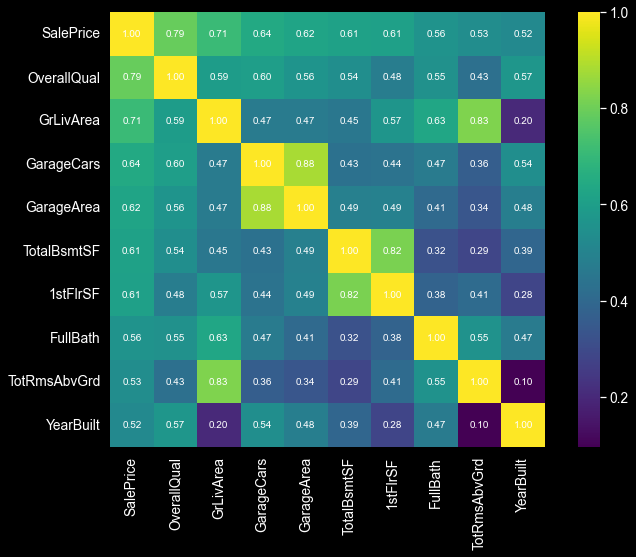

In [17]:
k = 10
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df_train[cols].values.T)

sns.set(font_scale=1.25)
plt.style.use("dark_background")

f, ax = plt.subplots(figsize=(12, 8))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
    ax=ax,
    cmap="viridis",
)

f.patch.set_facecolor("black")
ax.set_facecolor("black")

for text in hm.texts:
    text.set_color("white")

plt.show()

Strong Correlations with 'SalePrice':

    'OverallQual', 'GrLivArea', and 'TotalBsmtSF' are confirmed as the top variables most strongly correlated with 'SalePrice'. These variables are critical in understanding and predicting house prices, given their significant impact on the target variable.
    
Redundancy Among Variables:

    'GarageCars' vs. 'GarageArea': These two variables are highly correlated, as the garage's area directly influences the number of cars it can accommodate. Since their information overlaps considerably, it’s practical to retain only one for analysis. Given that 'GarageCars' has a slightly higher correlation with 'SalePrice', it would be reasonable to keep this variable and exclude 'GarageArea' to reduce redundancy.
    
    'TotalBsmtSF' vs. '1stFlrSF': Similarly, these variables exhibit a strong correlation. Keeping 'TotalBsmtSF' makes sense as it aligns with initial expectations about its importance. This choice also streamlines the analysis by focusing on a single, representative metric.
    
    'TotRmsAbvGrd' vs. 'GrLivArea': These variables are yet another pair of "twin brothers," meaning they provide similar information. Retaining 'GrLivArea', which has a stronger correlation with 'SalePrice', simplifies the model without sacrificing predictive power.
    
Surprising Correlations:

    'FullBath': This variable's correlation with 'SalePrice' is unexpected and warrants closer examination. While intuitively, the number of full bathrooms might influence price, its correlation being notable suggests it might be more influential than initially assumed.
    
'YearBuilt':

    Temporal Influence: The moderate correlation between 'YearBuilt' and 'SalePrice' suggests that newer homes might generally sell for higher prices. However, this variable introduces the potential need for time-series analysis to fully capture its impact, as housing markets evolve over time.
    
In summary,  analysis highlights the importance of identifying and addressing redundancy in correlated variables, as well as the potential need for more sophisticated modeling techniques, such as time-series analysis, to account for variables like 'YearBuilt'. This approach will help ensure a robust and interpretable model that accurately reflects the underlying relationships in the data.

#### Scatter plots between 'SalePrice' and correlated variables

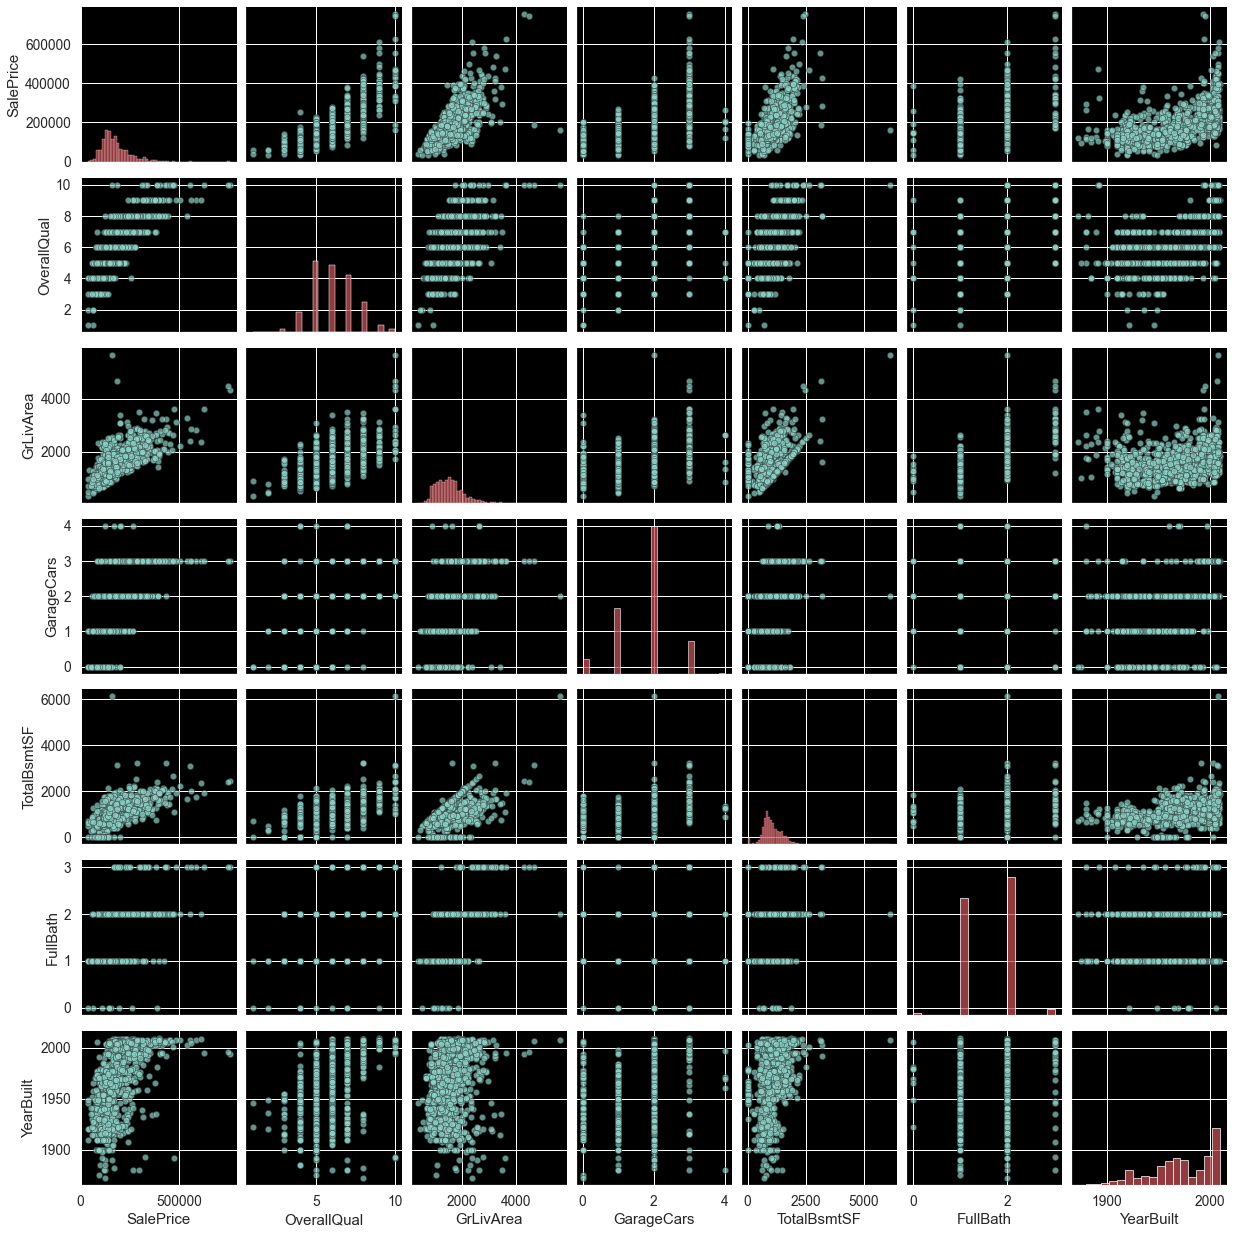

In [18]:
cols = [
    "SalePrice",
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "TotalBsmtSF",
    "FullBath",
    "YearBuilt",
]

plt.style.use("dark_background")
sns.set_style("darkgrid")

g = sns.pairplot(
    df_train[cols],
    height=2.5,
    plot_kws={"alpha": 0.7, "s": 40, "edgecolor": "k"},
    diag_kws={"color": "r"},
)

for ax in g.axes.flatten():
    ax.set_facecolor("black")

plt.show()

Scatter plots offer a visual representation of the relationships between different variables in  dataset, providing valuable insights into their interactions. Here are a few noteworthy observations:

'TotalBsmtSF' vs. 'GrLivArea':

    The scatter plot between 'TotalBsmtSF' (Total Basement Square Feet) and 'GrLivArea' (Above Ground Living Area) reveals a distinct linear relationship. Most data points lie below a linear boundary, which is logical since the basement area typically cannot exceed the above-ground living area, barring exceptional cases like specialized structures (e.g., bunkers). This plot highlights the natural constraint where 'TotalBsmtSF' usually equals or is less than 'GrLivArea', reinforcing the expected architectural design of residential properties.
    
'SalePrice' vs. 'YearBuilt':

    The scatter plot for 'SalePrice' and 'YearBuilt' shows an intriguing pattern, with the data points suggesting a possible exponential relationship. The lower portion of the scatter appears to follow a subtle exponential curve, indicating that older houses tend to have lower sale prices, while newer homes, particularly those built in recent years, are generally priced higher. The trend also suggests that recent years have seen a sharper increase in house prices, as evidenced by the cluster of higher prices for newer constructions.

# 4. Missing data

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)


In [19]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


To maintain the integrity of our dataset and streamline the analysis, we'll adopt a systematic approach to handle missing data based on the proportion of missing values. Here's the plan:


**Deletion of Variables with Significant Missing Data (>15%):**


> When more than 15% of a variable's data is missing, it indicates a substantial gap in the information. In these cases, instead of attempting to impute or fill in the gaps, we'll simply delete the variable from the dataset. This decision is based on the assumption that these variables are either not critical or represent aspects that are less relevant to the property buyers, which might explain why the data is missing

**Variables to Delete:**

> PoolQC, MiscFeature, Alley, and FireplaceQu are prime candidates for deletion. These variables likely represent features that are either luxury items or uncommon attributes, making them less central to the overall housing market. Additionally, these variables are potential outliers, and their removal could enhance the dataset's overall quality.

**Handling Variables with Minimal Missing Data (≤5%):**

>  For variables with a small proportion of missing data, we'll take a more nuanced approach. In cases where the missing data is consistent across related variables (e.g., Garage*X* and Bsmt*X*), we can safely delete these variables if they are redundant or less informative.
    
**Garage-Related Variables (Garage*X*):**

>     The primary information about garages is captured by GarageCars. Since this variable is crucial and covers most of the relevant information, we can delete other garage-related variables that have missing data, reducing redundancy in our dataset.
    
**Basement-Related Variables (Bsmt*X*):**

>     A similar logic applies here. By focusing on the most critical basement-related variable, we can remove other related variables with missing data without losing significant information
    
**Masonry Veneer Variables (MasVnrArea and MasVnrType):**

>     These variables are not essential for our analysis. Given their correlation with already included variables like YearBuilt and OverallQual, their deletion will not lead to a significant loss of information.
    
Special Case:

Electrical:

>     This variable has only one missing observation. Instead of deleting the entire variable, which might still be informative, we'll delete the single observation with missing data. This approach ensures that we retain valuable information while eliminating potential noise
    
**Summary**

By removing variables with substantial missing data and redundant variables with minimal missing data, we streamline our dataset without compromising the analysis. This approach also ensures that we focus on the most informative variables, improving the efficiency and accuracy of our model. In the case of Electrical, we preserve the variable by removing the outlier observation, maintaining its potential utility in the analysis.

In [20]:
df_train = df_train.drop(
    (missing_data[missing_data["Total"] > 1]).index, axis=1
)
df_train = df_train.drop(df_train[df_train["Electrical"].isnull()].index)
max_missing = df_train.isnull().sum().max()

# Out liars

### Univariate analysis

In [21]:
saleprice_scaled = StandardScaler().fit_transform(
    df_train["SalePrice"].values.reshape(-1, 1)
)

low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]

print("outer range (low) of the distribution:")
print(low_range)
print("\nouter range (high) of the distribution:")
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]



* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

### Bivariate analysis

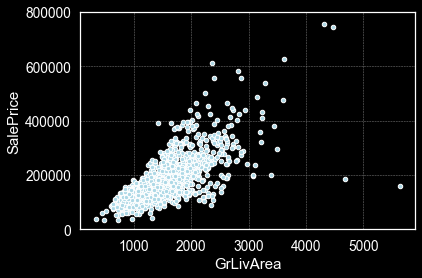

In [22]:
var = "GrLivArea"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)

plt.style.use("dark_background")
sns.set_style("darkgrid")

fig, ax = plt.subplots()
data.plot.scatter(
    x=var,
    y="SalePrice",
    ylim=(0, 800000),
    ax=ax,
    color="lightblue",
    edgecolor="white",
)

fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.grid(color="gray", linestyle="--", linewidth=0.5)
ax.tick_params(colors="white")
ax.yaxis.label.set_color("white")
ax.xaxis.label.set_color("white")
ax.title.set_color("white")

plt.show()

Potential Outliers with Large GrLivArea:

> There are two data points with significantly larger GrLivArea values that deviate from the general trend. These points are priced considerably lower than what would be expected for such large living areas. This anomaly suggests that these properties might not be typical residential homes. One plausible explanation is that these might be agricultural properties or other types of non-residential land, which could account for the low sale prices despite their large area.
Decision: Since these points are likely not representative of typical residential cases, they should be considered outliers. We will remove these two observations from our dataset to prevent them from skewing the analysis.

High-Value Observations Following the Trend:

> There are also two data points at the top of the plot with high SalePrice values (around 7.something, presumably referring to logarithmic scale). While these points are at the upper end of the distribution, they align well with the overall trend observed in the data. These points likely represent high-value properties that are consistent with the expected relationship between GrLivArea and SalePrice.
Decision: Since these observations appear to be valid and follow the general trend, they should be retained in the dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

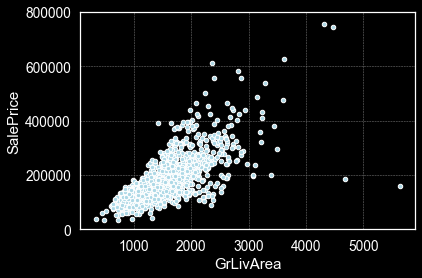

In [23]:
var = "GrLivArea"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)

plt.style.use("dark_background")
sns.set_style("darkgrid")


fig, ax = plt.subplots()
data.plot.scatter(
    x=var,
    y="SalePrice",
    ylim=(0, 800000),
    ax=ax,
    color="lightblue",
    edgecolor="white",
)


fig.patch.set_facecolor("black")
ax.set_facecolor("black")


ax.grid(color="gray", linestyle="--", linewidth=0.5)
ax.tick_params(colors="white")
ax.yaxis.label.set_color("white")
ax.xaxis.label.set_color("white")
ax.title.set_color("white")

plt.show

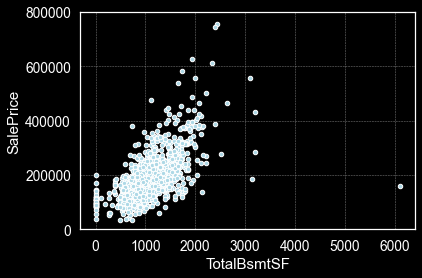

In [24]:
var = "TotalBsmtSF"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)

plt.style.use("dark_background")
sns.set_style("darkgrid")

fig, ax = plt.subplots()
data.plot.scatter(
    x=var,
    y="SalePrice",
    ylim=(0, 800000),
    ax=ax,
    color="lightblue",
    edgecolor="white",
)

fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.grid(color="gray", linestyle="--", linewidth=0.5)
ax.tick_params(colors="white")
ax.yaxis.label.set_color("white")
ax.xaxis.label.set_color("white")
ax.title.set_color("white")

plt.show()

# 5. Normalize dataset

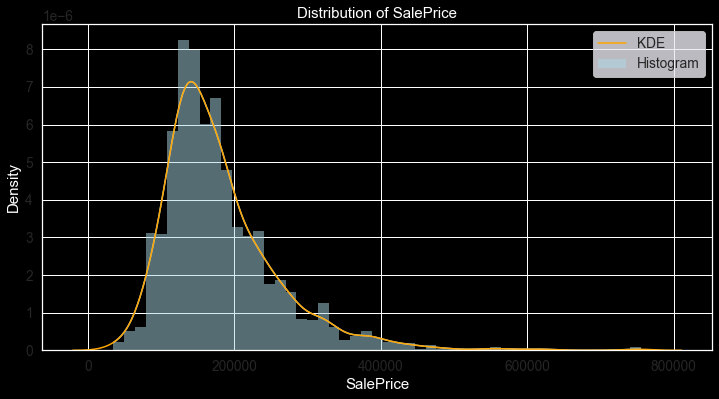

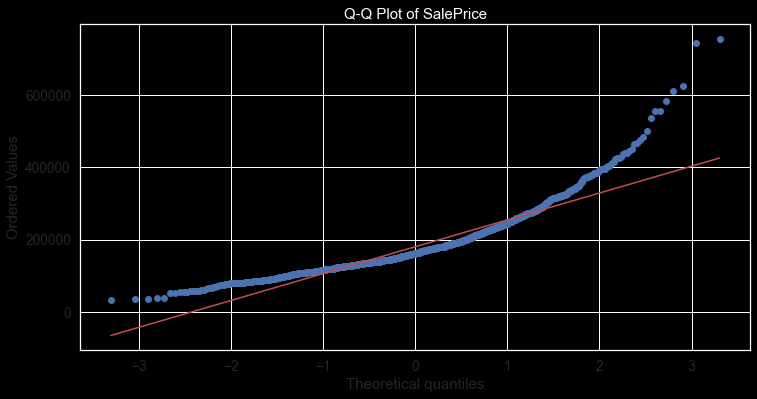

In [25]:
plt.style.use("dark_background")
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    df_train["SalePrice"],
    kde=True,
    color="lightblue",
    stat="density",
    linewidth=0,
    label="Histogram",
)
sns.kdeplot(df_train["SalePrice"], color="orange", label="KDE")
plt.title("Distribution of SalePrice", color="white")
plt.xlabel("SalePrice", color="white")
plt.ylabel("Density", color="white")
plt.legend()
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.show()

fig = plt.figure(figsize=(12, 6))
res = stats.probplot(df_train["SalePrice"], dist="norm", plot=plt)
plt.title("Q-Q Plot of SalePrice", color="white")
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.show()

Transforming the Data
Fortunately, there's a well-known statistical technique to address this issue: log transformation. When a variable like SalePrice shows positive skewness, applying a logarithmic transformation can often normalize the distribution, making it more symmetric and closer to a bell curve.

This technique is not just a convenient tool—it's almost like a magic spell from the world of statistics. By applying the log transformation to SalePrice, we can significantly improve the distribution's properties, facilitating more robust and reliable statistical analyses.

Next Steps
With this transformation in place, we can proceed with a variety of analyses that assume normality, confident that our data now better meets these assumptions. The transformation will help ensure that the relationships we uncover between SalePrice and other variables are more accurate and meaningful.

In [26]:
df_train["SalePrice"] = np.log(df_train["SalePrice"])

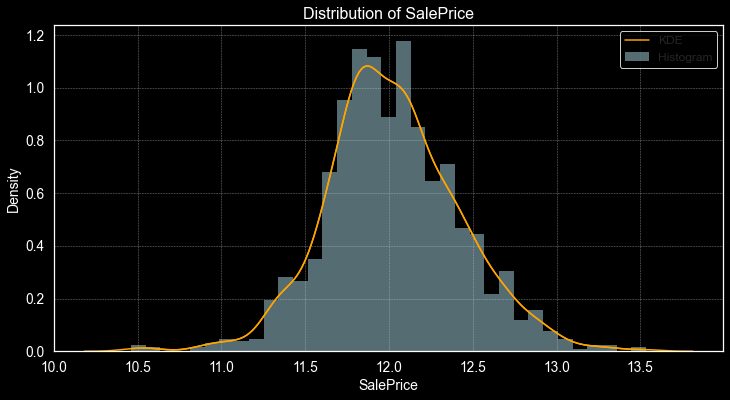

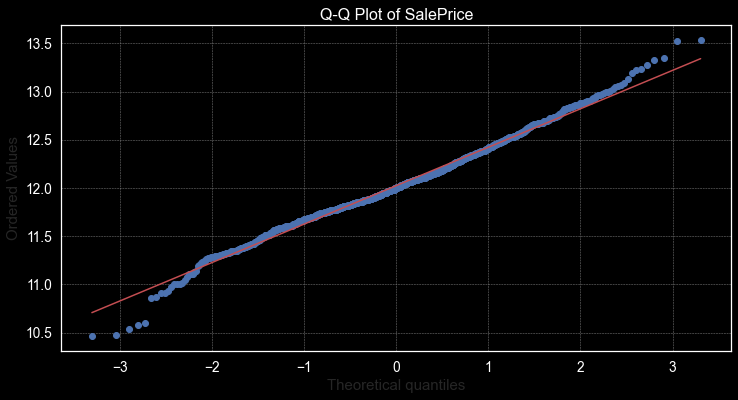

In [27]:
plt.style.use("dark_background")
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    df_train["SalePrice"],
    kde=True,
    color="lightblue",
    stat="density",
    linewidth=0,
    label="Histogram",
)
sns.kdeplot(df_train["SalePrice"], color="orange", label="KDE")
plt.title("Distribution of SalePrice", color="white", fontsize=16)
plt.xlabel("SalePrice", color="white", fontsize=14)
plt.ylabel("Density", color="white", fontsize=14)
plt.legend(
    frameon=True,
    facecolor="black",
    edgecolor="white",
    fontsize="12",
    loc="best",
)

plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", colors="white")


for line in plt.gca().get_lines():
    line.set_color("orange")
    line.set_label("KDE")

plt.show()

fig = plt.figure(figsize=(12, 6))
res = stats.probplot(df_train["SalePrice"], dist="norm", plot=plt)
plt.title("Q-Q Plot of SalePrice", color="white", fontsize=16)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", colors="white")
plt.show()

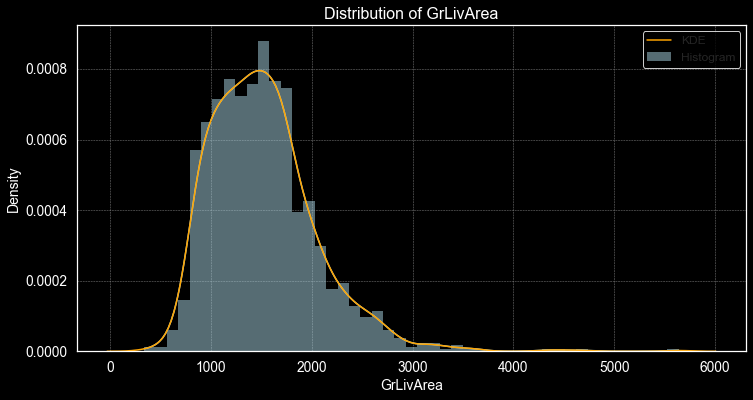

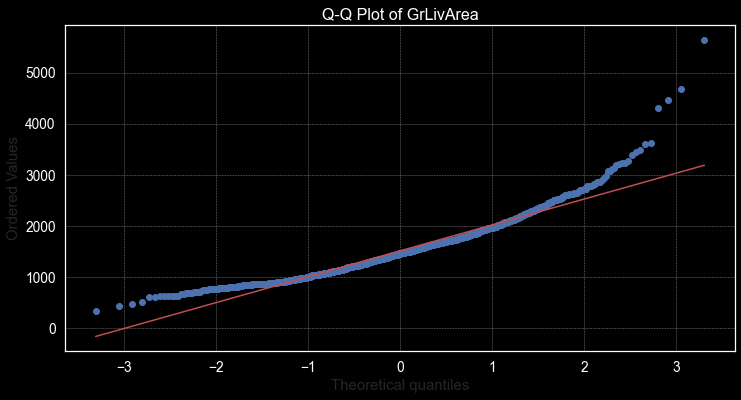

In [28]:
plt.style.use("dark_background")
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    df_train["GrLivArea"],
    kde=True,
    color="lightblue",
    stat="density",
    linewidth=0,
    label="Histogram",
)
sns.kdeplot(df_train["GrLivArea"], color="orange", label="KDE")
plt.title("Distribution of GrLivArea", color="white", fontsize=16)
plt.xlabel("GrLivArea", color="white", fontsize=14)
plt.ylabel("Density", color="white", fontsize=14)
plt.legend(
    frameon=True,
    facecolor="black",
    edgecolor="white",
    fontsize="12",
    loc="best",
)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", colors="white")
plt.show()


fig = plt.figure(figsize=(12, 6))
res = stats.probplot(df_train["GrLivArea"], dist="norm", plot=plt)
plt.title("Q-Q Plot of GrLivArea", color="white", fontsize=16)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", colors="white")
plt.show()

In [29]:
df_train["GrLivArea"] = np.log(df_train["GrLivArea"])

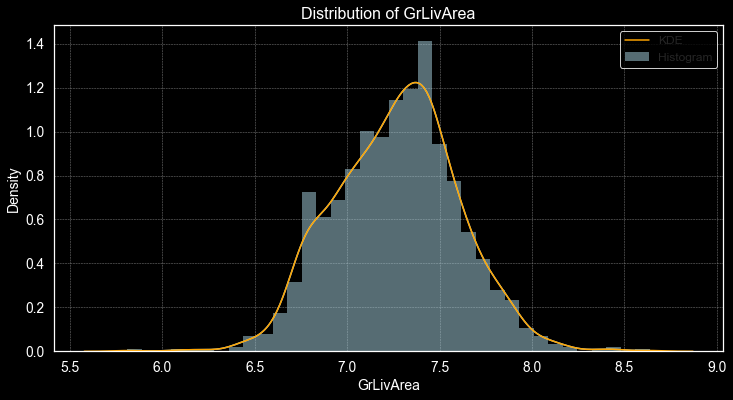

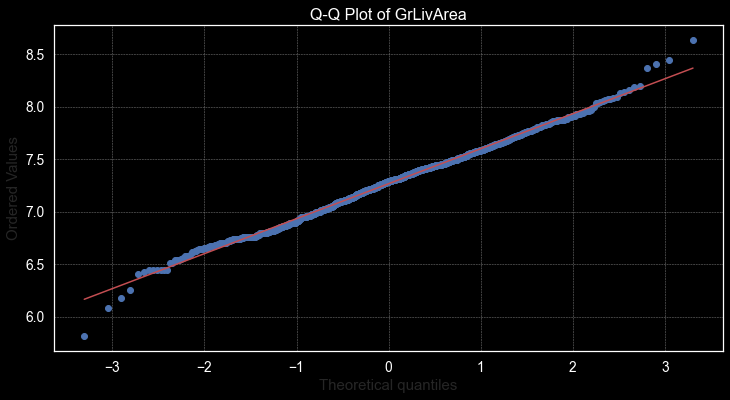

In [30]:
plt.style.use("dark_background")
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    df_train["GrLivArea"],
    kde=True,
    color="lightblue",
    stat="density",
    linewidth=0,
    label="Histogram",
)
sns.kdeplot(df_train["GrLivArea"], color="orange", label="KDE")
plt.title("Distribution of GrLivArea", color="white", fontsize=16)
plt.xlabel("GrLivArea", color="white", fontsize=14)
plt.ylabel("Density", color="white", fontsize=14)
plt.legend(
    frameon=True,
    facecolor="black",
    edgecolor="white",
    fontsize="12",
    loc="best",
)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", colors="white")
plt.show()


fig = plt.figure(figsize=(12, 6))
res = stats.probplot(df_train["GrLivArea"], dist="norm", plot=plt)
plt.title("Q-Q Plot of GrLivArea", color="white", fontsize=16)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", colors="white")
plt.show()

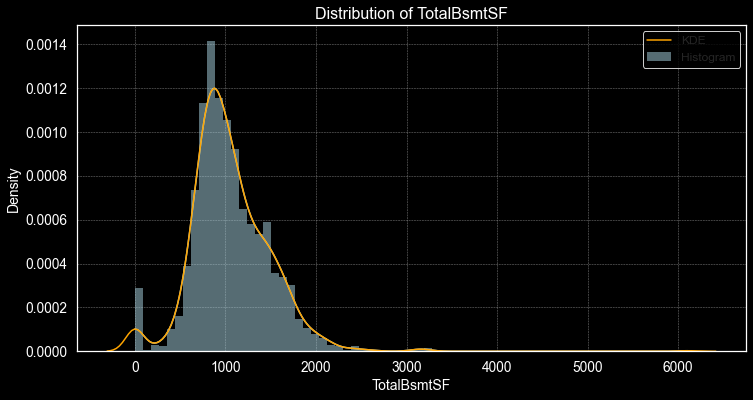

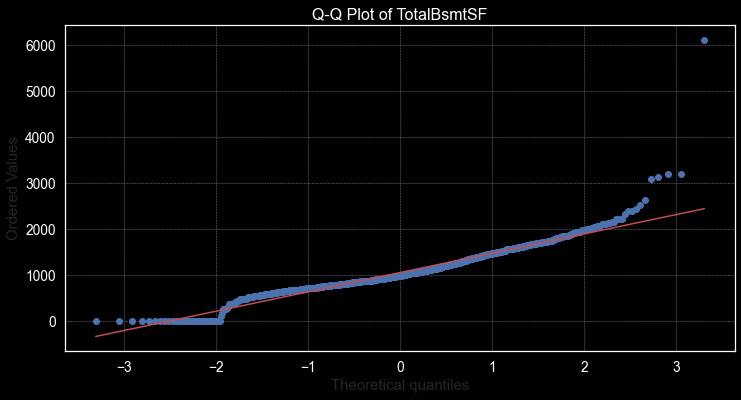

In [31]:
plt.style.use("dark_background")
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    df_train["TotalBsmtSF"],
    kde=True,
    color="lightblue",
    stat="density",
    linewidth=0,
    label="Histogram",
)
sns.kdeplot(df_train["TotalBsmtSF"], color="orange", label="KDE")
plt.title("Distribution of TotalBsmtSF", color="white", fontsize=16)
plt.xlabel("TotalBsmtSF", color="white", fontsize=14)
plt.ylabel("Density", color="white", fontsize=14)
plt.legend(
    frameon=True,
    facecolor="black",
    edgecolor="white",
    fontsize="12",
    loc="best",
)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", colors="white")
plt.show()

fig = plt.figure(figsize=(12, 6))
res = stats.probplot(df_train["TotalBsmtSF"], dist="norm", plot=plt)
plt.title("Q-Q Plot of TotalBsmtSF", color="white", fontsize=16)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", colors="white")
plt.show()

Now we're facing a significant challenge: dealing with a variable that not only exhibits skewness but also contains a considerable number of zero values—specifically, TotalBsmtSF (Total Basement Area). This is problematic because zero values prevent us from directly applying a log transformation, a common technique to correct skewness.

The Problem:

>     Skewness: The distribution of TotalBsmtSF is skewed, which could distort any linear relationships or statistical analyses.

>     Zero Values: A substantial number of houses in the dataset have no basement (TotalBsmtSF = 0). Logarithmic transformations are undefined for zero, which complicates our ability to apply a straightforward log transformation across the entire dataset.
    
Proposed Solution:
To tackle this, we can use a two-step approach:

    Create a Binary Variable: First, we'll generate a binary variable that captures whether a house has a basement (1 for having a basement, 0 for not having one). This new variable will help us retain the information about the presence or absence of a basement.

    Log Transformation for Non-Zero Values: Next, we'll apply the log transformation only to those observations where TotalBsmtSF is greater than zero. For observations where TotalBsmtSF = 0, we'll leave the value as is or handle it separately, ensuring we do not lose the distinction between houses with and without basements.

Is This Approach Correct

    This method might not be a textbook solution, but it seems like a practical approach to the problem. By combining a binary variable with selective log transformation, we attempt to mitigate the issues of skewness while preserving the essential characteristics of the data.

In [32]:
df_train["HasBsmt"] = pd.Series(
    len(df_train["TotalBsmtSF"]), index=df_train.index
)
df_train["HasBsmt"] = 0
df_train.loc[df_train["TotalBsmtSF"] > 0, "HasBsmt"] = 1

In [33]:
df_train.loc[df_train["HasBsmt"] == 1, "TotalBsmtSF"] = np.log(
    df_train["TotalBsmtSF"]
)

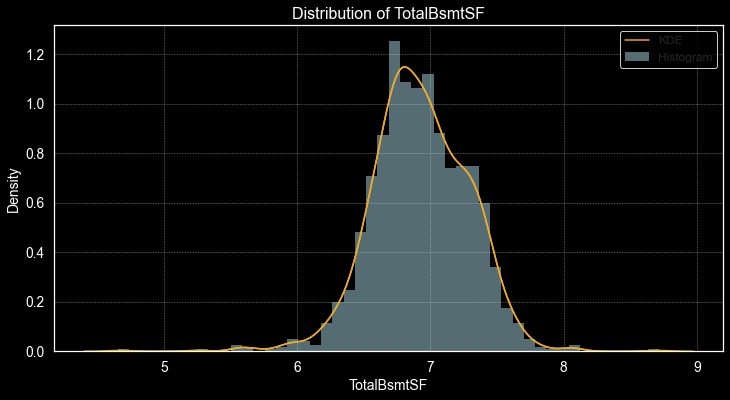

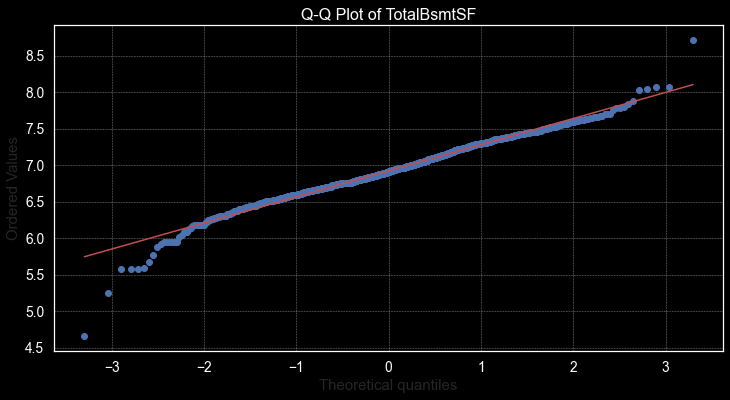

In [34]:
filtered_data = df_train[df_train["TotalBsmtSF"] > 0]["TotalBsmtSF"]

plt.figure(figsize=(12, 6))
sns.histplot(
    filtered_data,
    kde=True,
    color="lightblue",
    stat="density",
    linewidth=0,
    label="Histogram",
)
sns.kdeplot(filtered_data, color="orange", label="KDE")
plt.title("Distribution of TotalBsmtSF", color="white", fontsize=16)
plt.xlabel("TotalBsmtSF", color="white", fontsize=14)
plt.ylabel("Density", color="white", fontsize=14)
plt.legend(
    frameon=True,
    facecolor="black",
    edgecolor="white",
    fontsize="12",
    loc="best",
)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", colors="white")
plt.show()

fig = plt.figure(figsize=(12, 6))
res = stats.probplot(filtered_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of TotalBsmtSF", color="white", fontsize=16)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", colors="white")
plt.show()

The best approach to test homoscedasticity for two metric variables is graphically.

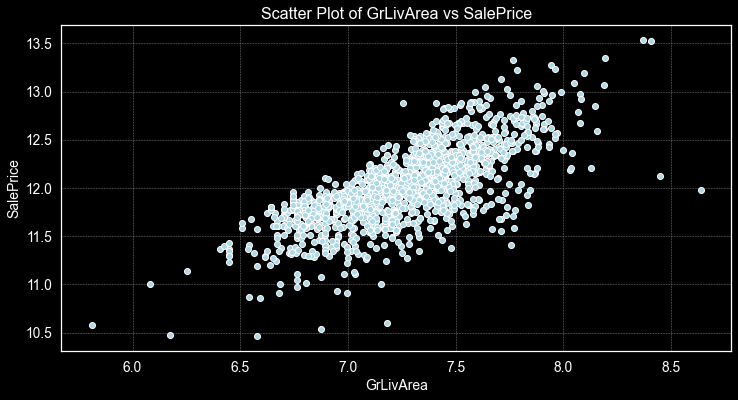

In [35]:
plt.figure(figsize=(12, 6))
plt.scatter(
    df_train["GrLivArea"],
    df_train["SalePrice"],
    color="lightblue",
    edgecolor="white",
)
plt.title("Scatter Plot of GrLivArea vs SalePrice", color="white", fontsize=16)
plt.xlabel("GrLivArea", color="white", fontsize=14)
plt.ylabel("SalePrice", color="white", fontsize=14)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.tick_params(axis="both", colors="white")
plt.show()

As we  see, the current scatter plot doesn't have a conic shape anymore.
Now let's check 'SalePrice' with 'TotalBsmtSF'.

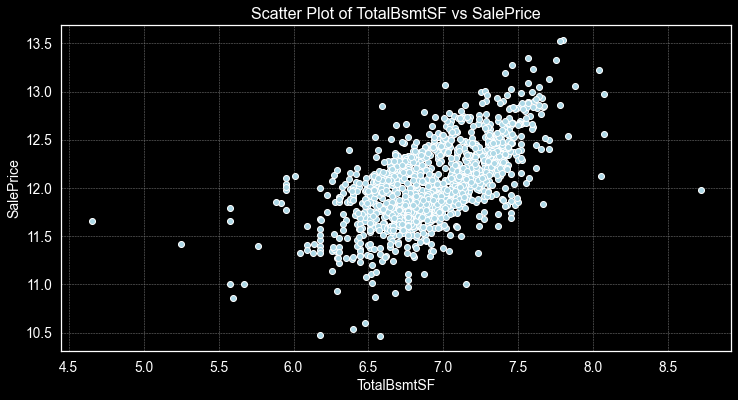

In [36]:
filtered_data = df_train[df_train["TotalBsmtSF"] > 0]

plt.figure(figsize=(12, 6))
plt.scatter(
    filtered_data["TotalBsmtSF"],
    filtered_data["SalePrice"],
    color="lightblue",
    edgecolor="white",
)
plt.title(
    "Scatter Plot of TotalBsmtSF vs SalePrice", color="white", fontsize=16
)
plt.xlabel("TotalBsmtSF", color="white", fontsize=14)
plt.ylabel("SalePrice", color="white", fontsize=14)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.tick_params(axis="both", colors="white")
plt.show()

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

In [37]:
df_train = pd.get_dummies(df_train)

# Conclusion

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

In [38]:
print(df_train.shape)
df_train[:10]

(1459, 223)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [39]:
print(df_train.head())

   Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  SaleType_New  \
0         706           0        150  ...               0             0   
1         978           0        284  ...               0             0   
2         486           0        434  ...               0             0   
3         216           0        540  ...               0             0   
4         655           0        490  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondi

In [40]:
X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=44, shuffle=True
)

print("X_train shape is ", X_train.shape)
print("X_test shape is ", X_test.shape)
print("y_train shape is ", y_train.shape)
print("y_test shape is ", y_test.shape)

X_train shape is  (977, 222)
X_test shape is  (482, 222)
y_train shape is  (977,)
y_test shape is  (482,)


In [41]:
models = {
    "LinearRegression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {"alpha": [0.1, 1, 10, 100]}),
    "SGDRegressor": (
        SGDRegressor(),
        {
            "alpha": [1e-4, 1e-3, 1e-2],
            "penalty": ["l2", "l1", "elasticnet"],
            "learning_rate": ["constant", "optimal", "adaptive"],
            "eta0": [0.001, 0.01, 0.1],
        },
    ),
    "RandomForestRegressor": (
        RandomForestRegressor(),
        {
            "n_estimators": [10, 50, 100],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
        },
    ),
    "ElasticNet": (
        ElasticNet(),
        {"alpha": [0.1, 1, 10], "l1_ratio": [0.1, 0.5, 0.9]},
    ),
    "GradientBoostingRegressor": (
        GradientBoostingRegressor(),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
        },
    ),
    "RidgeRegression": (Ridge(alpha=10, solver="svd", random_state=33), {}),
}


def evaluate_model(model_name, model, param_grid):
    print(f"Processing {model_name}...")

    grid_search = GridSearchCV(
        estimator=model, param_grid=param_grid, cv=5, return_train_score=True
    )
    grid_search.fit(X_train, y_train)

    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    return best_score, best_params


results = {}

for model_name, (model, param_grid) in models.items():
    best_score, best_params = evaluate_model(model_name, model, param_grid)
    results[model_name] = {
        "best_score": best_score,
        "best_params": best_params,
    }

results_df = pd.DataFrame(results).T.sort_values("best_score", ascending=False)
print("Comparison of Models:\n", results_df)

ridge_model = models["RidgeRegression"][0]
ridge_model.fit(X_train, y_train)
ridge_train_score = ridge_model.score(X_train, y_train)
ridge_test_score = ridge_model.score(X_test, y_test)
ridge_intercept = ridge_model.intercept_
ridge_predictions = ridge_model.predict(X_test)

print("Ridge Regression Train Score:", ridge_train_score)
print("Ridge Regression Test Score:", ridge_test_score)
print("Ridge Regression Intercept:", ridge_intercept)

Processing LinearRegression...
Processing Ridge...
Processing SGDRegressor...
Processing RandomForestRegressor...
Processing ElasticNet...
Processing GradientBoostingRegressor...
Processing RidgeRegression...
Comparison of Models:
                                                  best_score  \
GradientBoostingRegressor                          0.880598   
RandomForestRegressor                              0.857583   
Ridge                                              0.844776   
RidgeRegression                                    0.844776   
LinearRegression                                   0.805908   
ElasticNet                                          0.80428   
SGDRegressor              -454928370073968051124650901504.0   

                                                                 best_params  
GradientBoostingRegressor  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
RandomForestRegressor      {'max_depth': None, 'min_samples_split': 5, 'n...  
Ridge                     

In [42]:
MSEValue = mean_squared_error(
    y_test, ridge_predictions, multioutput="uniform_average"
)
print("Mean Squared Error Value is : ", MSEValue)
MdSEValue = median_absolute_error(y_test, ridge_predictions)
print("Median Absolute Error Value is : ", MdSEValue)

Mean Squared Error Value is :  0.018735026254059654
Median Absolute Error Value is :  0.06416318192002013


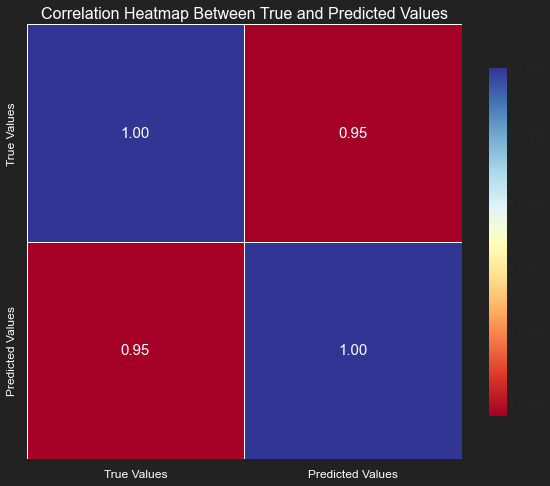

<Figure size 864x720 with 0 Axes>

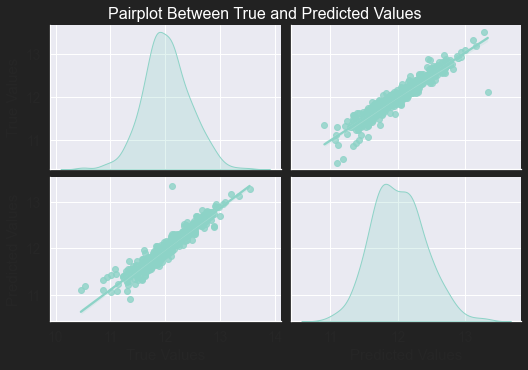

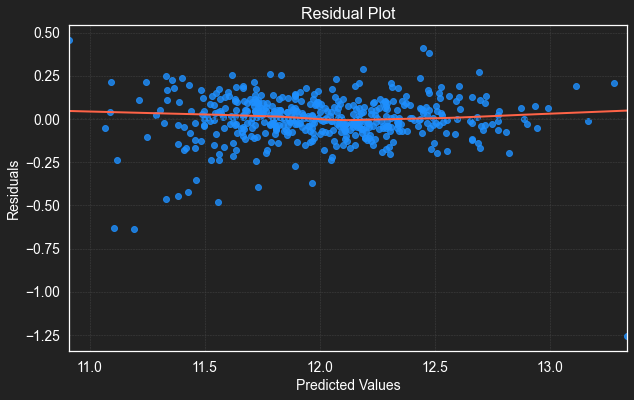

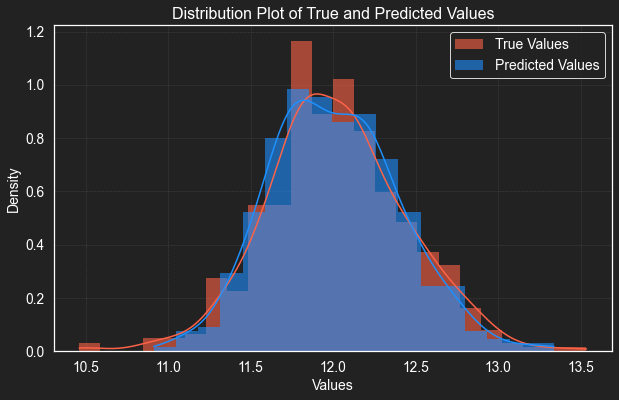

482
Mean Squared Error (MSE): 0.018735026254059654
R-squared (R2): 0.8967775296755872


In [43]:
df = pd.DataFrame(
    {"True Values": y_test, "Predicted Values": ridge_predictions}
)

vibrant_palette = ["#1E90FF", "#FF6347", "#FFD700", "#00FA9A"]

plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="RdYlBu",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    linecolor="#FFFFFF",
    square=True,
)
plt.title(
    "Correlation Heatmap Between True and Predicted Values",
    fontsize=16,
    color="#FFFFFF",
)
plt.xticks(fontsize=12, color="#FFFFFF")
plt.yticks(fontsize=12, color="#FFFFFF")
plt.gca().set_facecolor("#222222")
plt.gcf().patch.set_facecolor("#222222")
plt.show()

plt.figure(figsize=(12, 10))
sns.pairplot(
    df,
    kind="reg",
    diag_kind="kde",
    height=2.5,
    aspect=1.5,
    palette=vibrant_palette,
)
plt.suptitle(
    "Pairplot Between True and Predicted Values",
    y=1.02,
    fontsize=16,
    color="#FFFFFF",
)
plt.gcf().patch.set_facecolor("#222222")
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(
    x=ridge_predictions,
    y=y_test - ridge_predictions,
    lowess=True,
    line_kws={"color": "#FF6347", "lw": 2},
    scatter_kws={"color": "#1E90FF"},
)
plt.xlabel("Predicted Values", fontsize=14, color="#FFFFFF")
plt.ylabel("Residuals", fontsize=14, color="#FFFFFF")
plt.title("Residual Plot", fontsize=16, color="#FFFFFF")
plt.xticks(color="#FFFFFF")
plt.yticks(color="#FFFFFF")
plt.gca().set_facecolor("#222222")
plt.gcf().patch.set_facecolor("#222222")
plt.grid(color="#444444", linestyle="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(
    y_test,
    color="#FF6347",
    label="True Values",
    kde=True,
    stat="density",
    linewidth=0,
    alpha=0.6,
)
sns.histplot(
    ridge_predictions,
    color="#1E90FF",
    label="Predicted Values",
    kde=True,
    stat="density",
    linewidth=0,
    alpha=0.6,
)
plt.legend(
    frameon=True,
    facecolor="#222222",
    edgecolor="#FFFFFF",
    fontsize="14",
    loc="upper right",
    labelcolor="#FFFFFF",
)
plt.title(
    "Distribution Plot of True and Predicted Values",
    fontsize=16,
    color="#FFFFFF",
)
plt.xlabel("Values", fontsize=14, color="#FFFFFF")
plt.ylabel("Density", fontsize=14, color="#FFFFFF")
plt.xticks(color="#FFFFFF")
plt.yticks(color="#FFFFFF")
plt.gca().set_facecolor("#222222")
plt.gcf().patch.set_facecolor("#222222")
plt.grid(color="#444444", linestyle="--", linewidth=0.5)
plt.show()

mse = mean_squared_error(y_test, ridge_predictions)
print(len(ridge_predictions))
r2 = r2_score(y_test, ridge_predictions)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

In [60]:
test_file_path = "./input/test.csv"
test_data = pd.read_csv(test_file_path)

# Убедитесь, что вы захватываете все строки данных
ids = test_data.pop("Id")[:482]

# Преобразование категориальных переменных в числовые
test_data_encoded = pd.get_dummies(test_data)

# Проверка на пропущенные значения и замена их средним значением (если нужно)
test_data_encoded.fillna(test_data_encoded.mean(), inplace=True)

# Преобразование данных
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data_encoded)


# Прежде чем вызывать `predict`, убедитесь, что модель обучена
# Например:
# ridge_model.fit(X_train_scaled, y_train)  # Замените на ваш код обучения модели
preds = ridge_predictions

# Создание DataFrame для выхода
output = pd.DataFrame({"Id": ids, "SalePrice": preds})

# Показать первые строки результата
print(output.head())

     Id  SalePrice
0  1461  11.733140
1  1462  11.564524
2  1463  12.190238
3  1464  11.662287
4  1465  12.026774


In [62]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Engineering: Polynomial Features and Feature Selection
poly = PolynomialFeatures(degree=2)
k_best = SelectKBest(score_func=f_regression, k=10)

# Model Stacking
estimators = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=10, min_samples_leaf=1, random_state=42)),
]

stacked_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Pipeline with Feature Engineering and Model Stacking
pipeline = Pipeline([
    ('poly', poly),
    ('k_best', k_best),
    ('stacked_model', stacked_model)
])

pipeline.fit(X_train, y_train)
y_pred_stacked = pipeline.predict(X_test)

print("Stacked Model")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stacked)))
print("R²:", r2_score(y_test, y_pred_stacked))


Stacked Model
RMSE: 0.18655429383048158
R²: 0.8082521772822623


In [63]:
import joblib

# Save the pipeline model
joblib.dump(pipeline, "stacked_model_pipeline.pkl")


['stacked_model_pipeline.pkl']